# Anemia Detection and Severity Classification in Kenya : A predictive statistics

## 1. Business Understanding

### (a) Introduction


The Kenya Medical Research Institute(KEMRI) is a state corporation established in Kenya in 1979 through the Science and Technology Act, Cap 250 of the Laws of Kenya. It operates under the Science Technology and Innovation Act, 2013 as the national body responsible for carrying out research in human health in Kenya. KEMRI is the medical research arm of the government and provides advice to the Ministry of Health(MOH) on various aspects of healthcare and delivery.

KEMRI's mission is to improve human health and quality of life through research , capacity builging , innovation and service delivery. The Institute conducts research under seven research programs including Biotechnology, Public Health and Health Systems, Sexual Reproductive Adolescent and Child health,Natural Products and Drug Development, Infectios and Parasitic Diseases and Non-Communicable Diseases.

Within the Health Sector, KEMRI is responsible for providing leadership in health research and development, shaping the health research agenga, setting norms and standards, articulating evidence-based policy options, monitoring and assessing health trends as well as dealing with trans-boundary threats and disease outbreaks. The institute further continues to be responsive the challenges of emerging and re-emerging diseases including Non-Communicable Diseases and communicable conditions and bio-terrorism.

Anemia is one of the diseaes that have posed a significant public health problem. Anemia is a condition in which the body lacks enough red blood cells to carry oxygen to the body's tissues. According to the World Health Organization, anemia is a serious global public health problem that particularly affects young children, mensturating adolescent girls, pregnant and postpaturm women.Anemia can be classified in three different levels based on its severity. The severity of the anemia is determined by measuring the level of haemoglobin in the blood.These levels are mild,moderate and severe.

In this project we aim to develop predictive models utilizing factors such as Red blood Cell count,age, sex,white bllod cell count etc to help predict the presence of anemia and its severity in different persons. By critically analyzing this different factors we will be able to help KEMRI which was commisioned by the Ministry of Health to improve on the current diagnostic tools on anemia detection in terms of efficiency and accuracy. By doing this we aim to encourage accurate early predictions which may ultimately lead to accelerated interventions.













### (b) Problem Statement

Efficient and accurate anemia detection, coupled with precise severity measurement, presents a critical challenge in modern healthcare, especially in the context of Kenya's medical landscape. The current diagnostic tools lack the precision needed for early identification, leading to delayed interventions, suboptimal patient outcomes, and escalated healthcare costs due to preventable hospitalizations. In response to this, the Kenya Medical Research Institute (KEMRI), commissioned by the Ministry of Health (MOH), is embarking on a pioneering project. Our goal is to develop predictive models utilizing comprehensive blood count (CBC) parameters, age, and gender data, harnessing the power of machine learning. These models will ease the identification of anemia, to the benefit of patients, healthcare proffesionals, KEMRi and the MOH. Solving this problem may significantly enhance patient care, improve medical decision-making, and alleviate healthcare burdens, contributing data-driven insights to inform healthcare policies and strategies.

### (c) Defining Metrics of Success

The predictive model will be successful if it provides a well defined picture of health care utilization in respect to age, gender and the Comprehensive Blood Count in the blood sample.


### (d) Research Questions

<br>•Based on CBC, age, and gender, how can we forecast the presence of anemia and its severity as early as possible?
<br>•Which age group of the population is most susceptible to anemia?
<br>•What are the effects the symptoms and impacts of Anemia to a human body?
<br>•What effects does anemia have on the various genders?
<br>•What effects does anemia have on people's performance and quality of life?


### (e) Objectives

1. Determine normal reference ranges for key CBC parameters in this population overall and stratified by age and sex
2. Examine the relationship between age and abnormal CBC findings
3. Calculate the proportion of patients with abnormal results for each CBC parameter
4. Compare the prevalence of abnormal CBC results between males and females
5. Analyze the association between RBC indices and anemia to understand RBC characteristics in anemic patients


### (f) Data Understanding
The dataset is derived from complete blood count (CBC) tests performed using a Hematology analyzer. The dataset comprises 11 attributes for each patient, including age, gender, and various CBC parameters such as hemoglobin (HGB) level, mean cell volume (MCV), mean cell hemoglobin (MCH), mean cell hemoglobin concentration (MCHC), red cell distribution width (RDW), red blood cell count (RBC), white blood cell count (WBC), platelet count (PLT), and packed cell volume (PCV). The attributes have specific ranges associated with normal values for each parameter. These ranges provide context for evaluating the health status of patients and identifying deviations from the normal ranges that could indicate the presence of anemia.

1. **Age:** Numerical attribute representing the current age of the patients. The age range is between 11 and 100 years.

2. **Gender:** Categorical attribute representing the gender of the patient. The possible values are Male and Female.

3. **Hemoglobin (HGB):** Numerical attribute indicating the level of hemoglobin in the blood. The normal range for hemoglobin is between 11 and 16 g/dL.

4. **Mean Cell Volume (MCV):** Numerical attribute indicating the mean volume of a red blood cell. The normal range for MCV is between 80 and 101 fL.

5. **Mean Cell Hemoglobin (MCH):** Numerical attribute indicating the mean amount of hemoglobin in a red blood cell. The normal range for MCH is between 27 and 32 pg.

6. **Mean Cell Hemoglobin Concentration (MCHC):** Numerical attribute indicating the mean concentration of hemoglobin in a red blood cell. The normal range for MCHC is between 31 and 37 g/dL.

7. **Red Cell Distribution Width (RDW):** Numerical attribute indicating the variation in the size of red blood cells. The normal range for RDW is between 11 and 16%.

8. **Red Blood Cell Count (RBC):** Numerical attribute indicating the count of red blood cells per microliter of blood. The normal range for RBC is between 3.80 and 4.80 million/uL.

9. **White Blood Cell Count (WBC):** Numerical attribute indicating the count of white blood cells per microliter of blood. The normal range for WBC is between 3.5 and 11.5 thousand/uL.

10. **Platelet Count (PLT):** Numerical attribute indicating the count of platelets per microliter of blood. The normal range for platelet count is between 150 and 450 thousand/uL.

11. **Packed Cell Volume (PCV):** Numerical attribute indicating the volume percentage of red blood cells in whole blood. The normal range for PCV is between 36 and 46.



## 2. Importing necessary libraries

In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score , multilabel_confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline


## 3.Reading into the data

In [2]:
# loading the dataset
df = pd.read_csv("CBC data_for_meandeley_csv.csv")

In [3]:
df.head(4)

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4


## 4. Data Wrangling

### (a) Feature Engineering

In [4]:
#changing column names
names = ["S.NO","Age","Sex","Red Blood Cell count",
                 	"Packed Cell Volume","Mean Cell Volume",
                    "Mean Cell Hemoglobin",	"MCHC","Red Cell Distribution width",
                    "White Blood Cell (WBC count)","Platelet","Hemoglobin"]
df.columns = names
df.head()

,S.NO,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3


dropping the first row and the first column

In [5]:
#dropping the first row
df = df.drop([0],axis=0)
df.drop("S.NO",axis = 1, inplace = True)
df.head()

,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin
1,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3
5,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196,11.5


In [6]:
# shape of the data
df.shape

(373, 11)

The dataset has 12 columns and 373 rows

In [7]:
# datatypes of different columns in the data set
datatypes = df.dtypes
dname = [ "DataType"]
dtypedf=pd.DataFrame(datatypes )
dtypedf.columns = dname
dtypedf

,DataType
Age,float64
Sex,float64
Red Blood Cell count,object
Packed Cell Volume,object
Mean Cell Volume,object
Mean Cell Hemoglobin,object
MCHC,float64
Red Cell Distribution width,object
White Blood Cell (WBC count),object
Platelet,object


In [8]:
#Convert columns to respective data types
df["Age"] = df["Age"].astype(float)
df["Sex"] = df["Sex"].astype(float)
df["Red Blood Cell count"] = df["Red Blood Cell count"].astype(float)
df["Packed Cell Volume"] = df["Packed Cell Volume"].astype(float)
df["Mean Cell Volume"] = df["Mean Cell Volume"].astype(float)
df["Mean Cell Hemoglobin"] = df["Mean Cell Hemoglobin"].astype(float)
df["MCHC"] = df["MCHC"].astype(float)
df["Red Cell Distribution width"] = df["Red Cell Distribution width"].astype(float)
df["White Blood Cell (WBC count)"] = df["White Blood Cell (WBC count)"].astype(float)
df["Platelet"] = df["Platelet"].astype(float)
df["Hemoglobin"] = df["Hemoglobin"].astype(float)

In [9]:
# checking the first five columns of the converted dataframe
df.head()

,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin
1,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
2,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
3,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
4,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
5,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [10]:
#checking the data types of the columns
df.dtypes

Age                             float64
Sex                             float64
Red Blood Cell count            float64
Packed Cell Volume              float64
Mean Cell Volume                float64
Mean Cell Hemoglobin            float64
MCHC                            float64
Red Cell Distribution width     float64
White Blood Cell (WBC count)    float64
Platelet                        float64
Hemoglobin                      float64
dtype: object

The object data types have been converted to floats because objects cannot be directly used in machine learning algorithms hence they are converted into floats to make it easier to use them as inputs in our machine learning algorithms

In [11]:
#creating anemia class column
mild_threshold = 10
moderate_threshold = 7
def classify_anemia(hb_level):
    if hb_level >= mild_threshold:
        return 'No Anemia'
    elif hb_level >= moderate_threshold:
        return 'Mild Anemia'
    else:
        return 'Moderate/Severe Anemia'

df['Anemia Classification'] = df['Hemoglobin'].apply(classify_anemia)

In [12]:
# checking the first five columns of the dataframe
df.head()

,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin,Anemia Classification
1,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,Mild Anemia
2,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,No Anemia
3,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,No Anemia
4,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3,No Anemia
5,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5,No Anemia


The new column called Anemia Classification has been created as our target variable to make it easier to predict different classes of anemia.

### (b) Handling Missing Values

In [13]:
# sum of missing data per column
df.isna().sum()

Age                             9
Sex                             9
Red Blood Cell count            9
Packed Cell Volume              9
Mean Cell Volume                9
Mean Cell Hemoglobin            9
MCHC                            9
Red Cell Distribution width     9
White Blood Cell (WBC count)    9
Platelet                        9
Hemoglobin                      9
Anemia Classification           0
dtype: int64

In [14]:

# Put the specified columns in a variable called columns
columns = ['Age', 'Sex', 'Red Blood Cell count', 'Packed Cell Volume', 'Mean Cell Volume', 'Mean Cell Hemoglobin', 'MCHC', 'Red Cell Distribution width', 'White Blood Cell (WBC count)', 'Platelet', 'Hemoglobin']

# Calculate the median of each column
medians = df[columns].median()

# Fill missing values in the specified columns with the median of each column
df[columns] = df[columns].fillna(medians)


In [15]:
df.isna().sum()

Age                             0
Sex                             0
Red Blood Cell count            0
Packed Cell Volume              0
Mean Cell Volume                0
Mean Cell Hemoglobin            0
MCHC                            0
Red Cell Distribution width     0
White Blood Cell (WBC count)    0
Platelet                        0
Hemoglobin                      0
Anemia Classification           0
dtype: int64

All the missing values in the column have been filled with the median to avoid losing valid data as compared to dropping them. They have also been filled with the median because it is less suseptible to outliers as compared to the mean.

### (c) Checking for duplicates

In [16]:
df.duplicated().sum()

16

Even though this indicates that there are 16 duplicates the actual rows are not duplicated they each represent a unique person

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,44.907507,18.552386,11.00,28.00,44.500,60.00,89.00
Sex,373.0,0.431635,0.495970,0.00,0.00,0.000,1.00,1.00
Red Blood Cell count,373.0,4.280094,0.810230,1.36,3.81,4.335,4.79,6.90
Packed Cell Volume,373.0,36.763807,6.747700,13.10,32.90,36.800,41.80,56.90
Mean Cell Volume,373.0,87.519759,9.218833,55.70,83.40,87.950,91.70,124.10
Mean Cell Hemoglobin,373.0,28.226488,3.818948,14.70,26.40,28.200,30.40,41.40
MCHC,373.0,32.044879,2.768223,23.60,30.30,31.700,33.30,50.20
Red Cell Distribution width,373.0,15.108874,2.150617,10.60,13.60,14.800,16.10,29.20
White Blood Cell (WBC count),373.0,8.841166,4.811364,2.00,6.00,7.935,10.10,42.42
Platelet,373.0,223.419035,98.220013,10.00,153.00,210.000,267.00,660.00


### (d) Checking for outliers

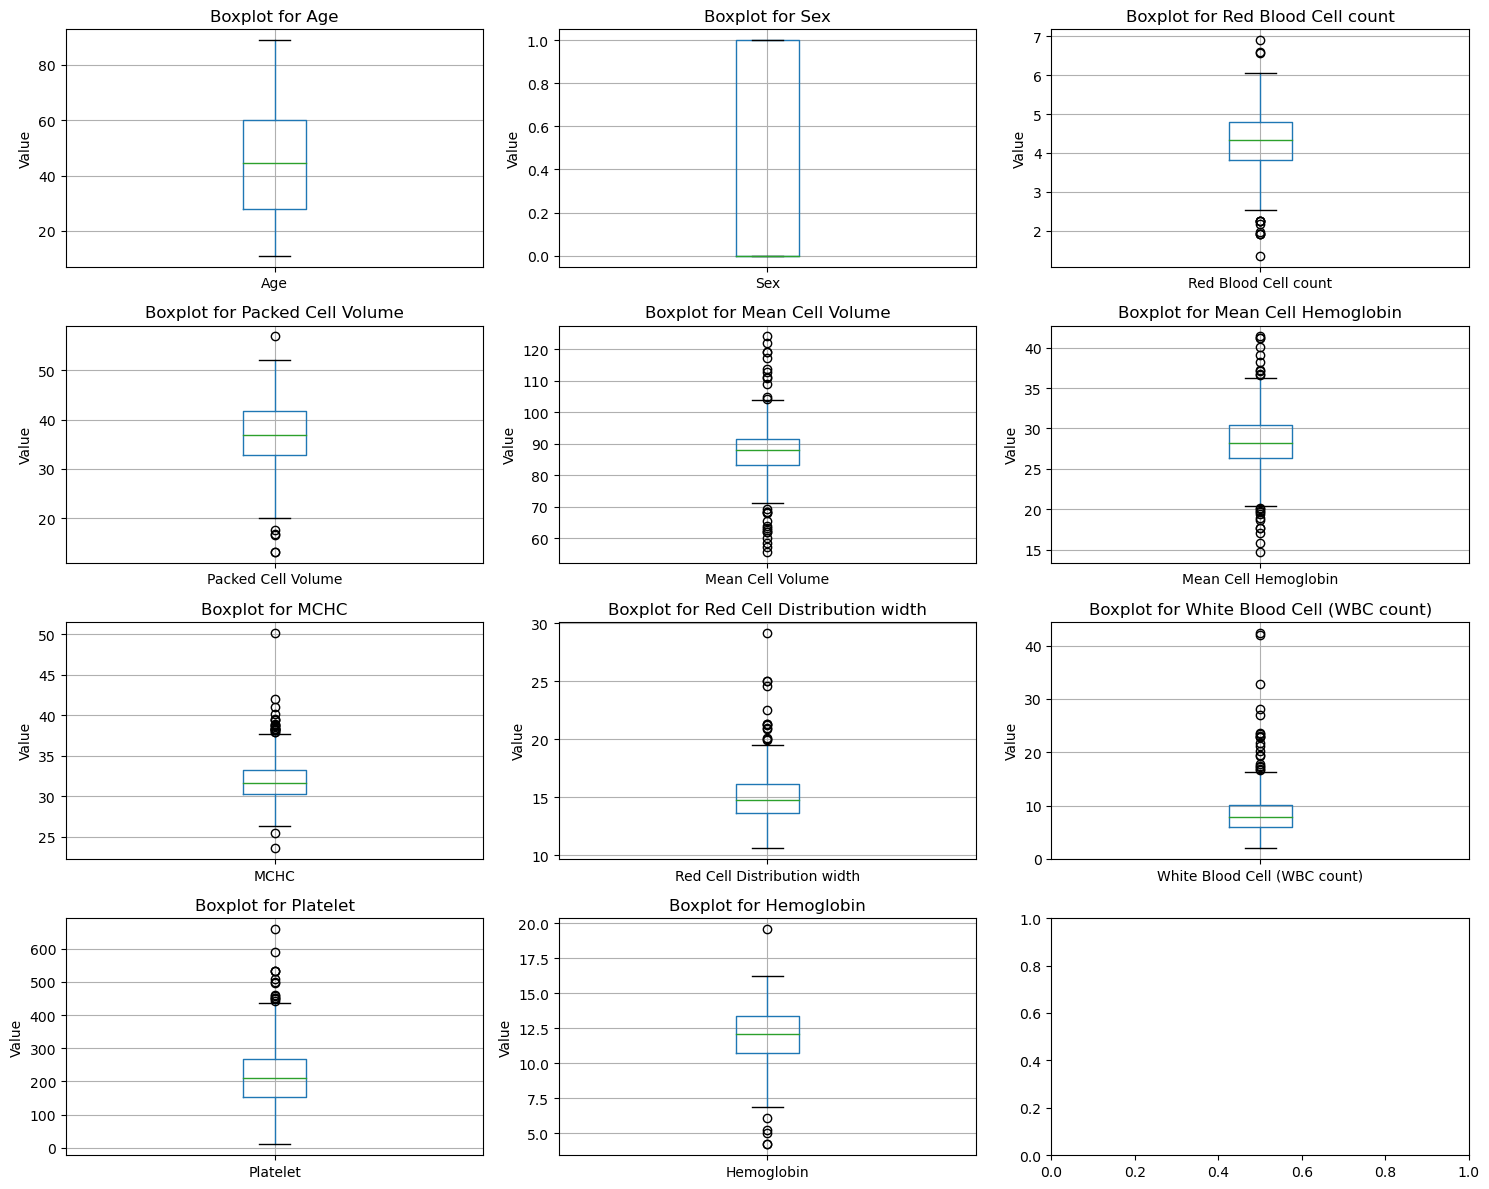

In [18]:
#checking for outliers using a boxplot
selected_columns = [
    'Age',
    'Sex',
    'Red Blood Cell count',
    'Packed Cell Volume',
    'Mean Cell Volume',
    'Mean Cell Hemoglobin',
    'MCHC',
    'Red Cell Distribution width',
    'White Blood Cell (WBC count)',
    'Platelet',
    'Hemoglobin'
]
# Determine the number of rows and columns for the grid
num_rows = 4
num_cols = 3
# Create a grid of boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))
axes = axes.flatten()

# Create individual labeled boxplots for each column
for i, column in enumerate(selected_columns):
    ax = axes[i]
    df.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot for {column}')
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()


Even though respective column boxplots indicates outliers in the column data, they are not treated as outliers in this case because they indicate actual existing values hence the outliers are not dropped.

## 4.Exploratory Data Analysis

### (a) Correlations

In [19]:
df.head(3)

,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin,Anemia Classification
1,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,Mild Anemia
2,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,No Anemia
3,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,No Anemia


Since haemoglobin is a protein on the surface of the red blood cell. We will understand how they are colerrated

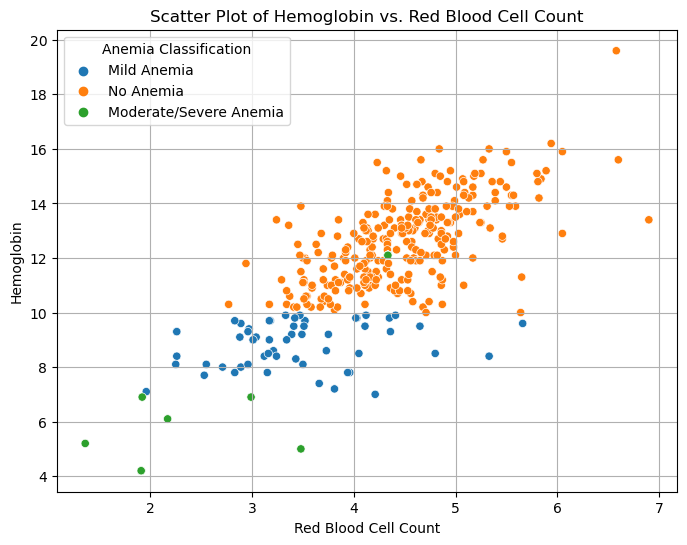

In [20]:
# checking correlation between red blood cell count vs haemoglobin
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df,x='Red Blood Cell count', y='Hemoglobin', hue = "Anemia Classification")
plt.title('Scatter Plot of Hemoglobin vs. Red Blood Cell Count')
plt.xlabel('Red Blood Cell Count')
plt.ylabel('Hemoglobin')
plt.grid(True)
plt.show()

In [21]:
cor = np.corrcoef(df['Red Blood Cell count'],df['Hemoglobin'])
print(f"The correlation coefficient is {round(cor[0][1],4)}")

The correlation coefficient is 0.7466


Haemoglobin is moderately correlated with red blood cell count. This is because red blood cells contain haemoglobin in them to transport oxygen through the body hence a correlation is expected.



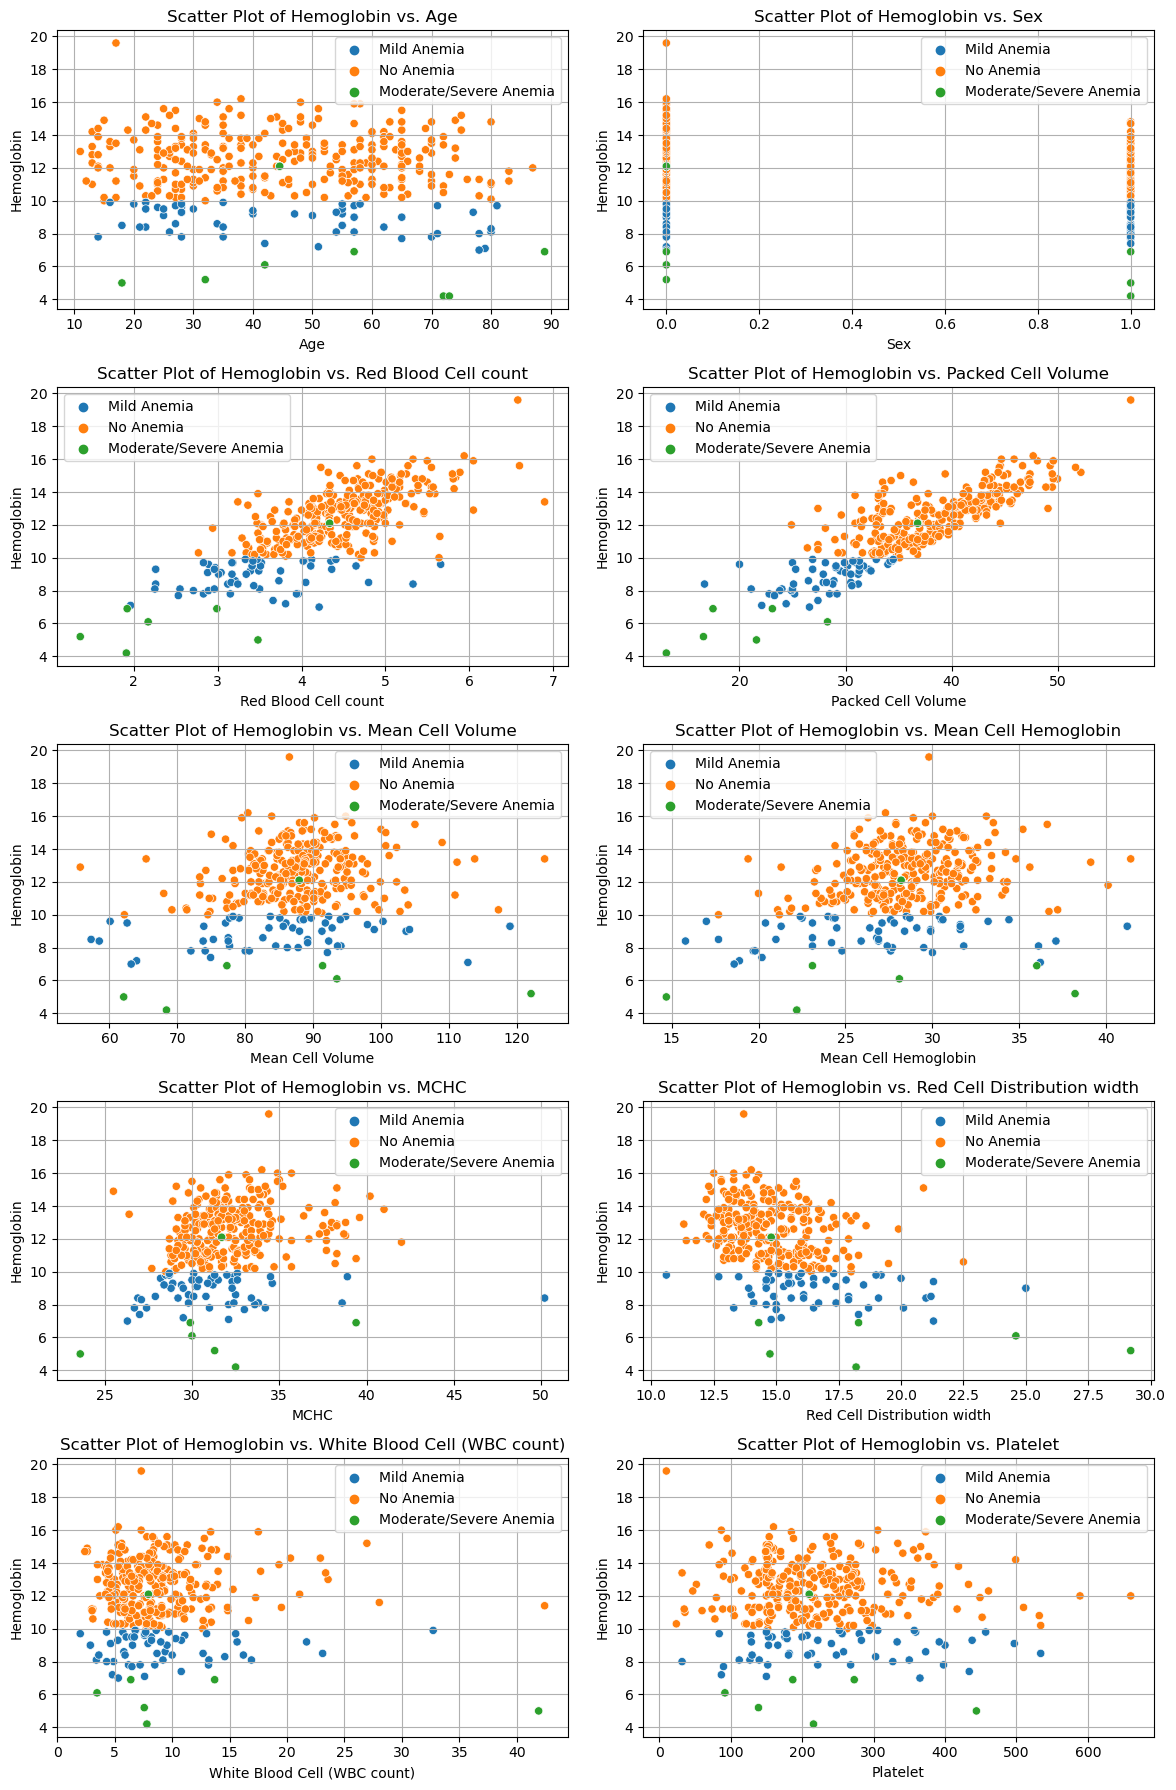

In [22]:
columns_for_scatter = [
    'Age',
    'Sex',
    'Red Blood Cell count',
    'Packed Cell Volume',
    'Mean Cell Volume',
    'Mean Cell Hemoglobin',
    'MCHC',
    'Red Cell Distribution width',
    'White Blood Cell (WBC count)',
    'Platelet'
]
# Create a single figure with subplots
num_rows = 5
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create scatter plots for each column
for i, column in enumerate(columns_for_scatter):
    sns.scatterplot(data=df, x=df[column], y=df['Hemoglobin'], hue="Anemia Classification", ax=axes[i])
    axes[i].set_title(f'Scatter Plot of Hemoglobin vs. {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Hemoglobin')
    axes[i].grid(True)
    axes[i].legend()

# Hide any remaining empty subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Both Packed cell volume and red blood cell have are highly correlated to the level of haemoglobin in the body. If their level is high then level of haemoglobin will be high.
<p> The rest of attribute have uniform to low corelation with haemoglobin

### (b) Distibutions of different data in colunms 

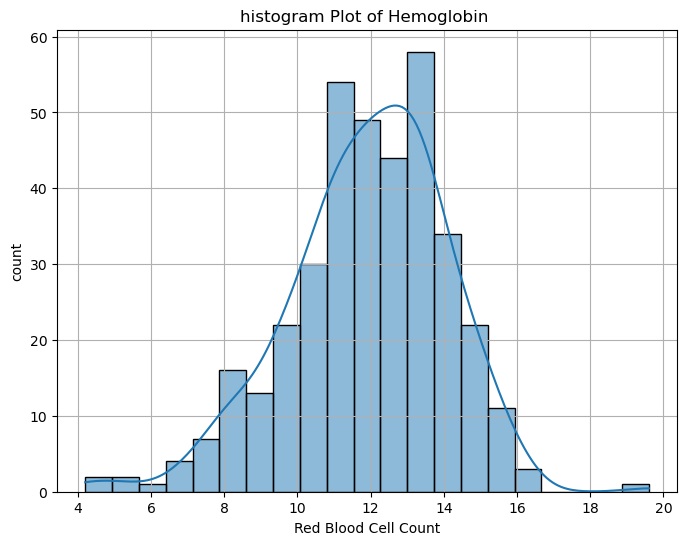

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data = df,x='Hemoglobin',kde = True)
plt.title('histogram Plot of Hemoglobin ')
plt.xlabel('Red Blood Cell Count')
plt.ylabel('count')
plt.grid(True)
plt.show()

Hemoglobin is normaly distibuted and symmetrical indicating mean, mode and median are close to each other

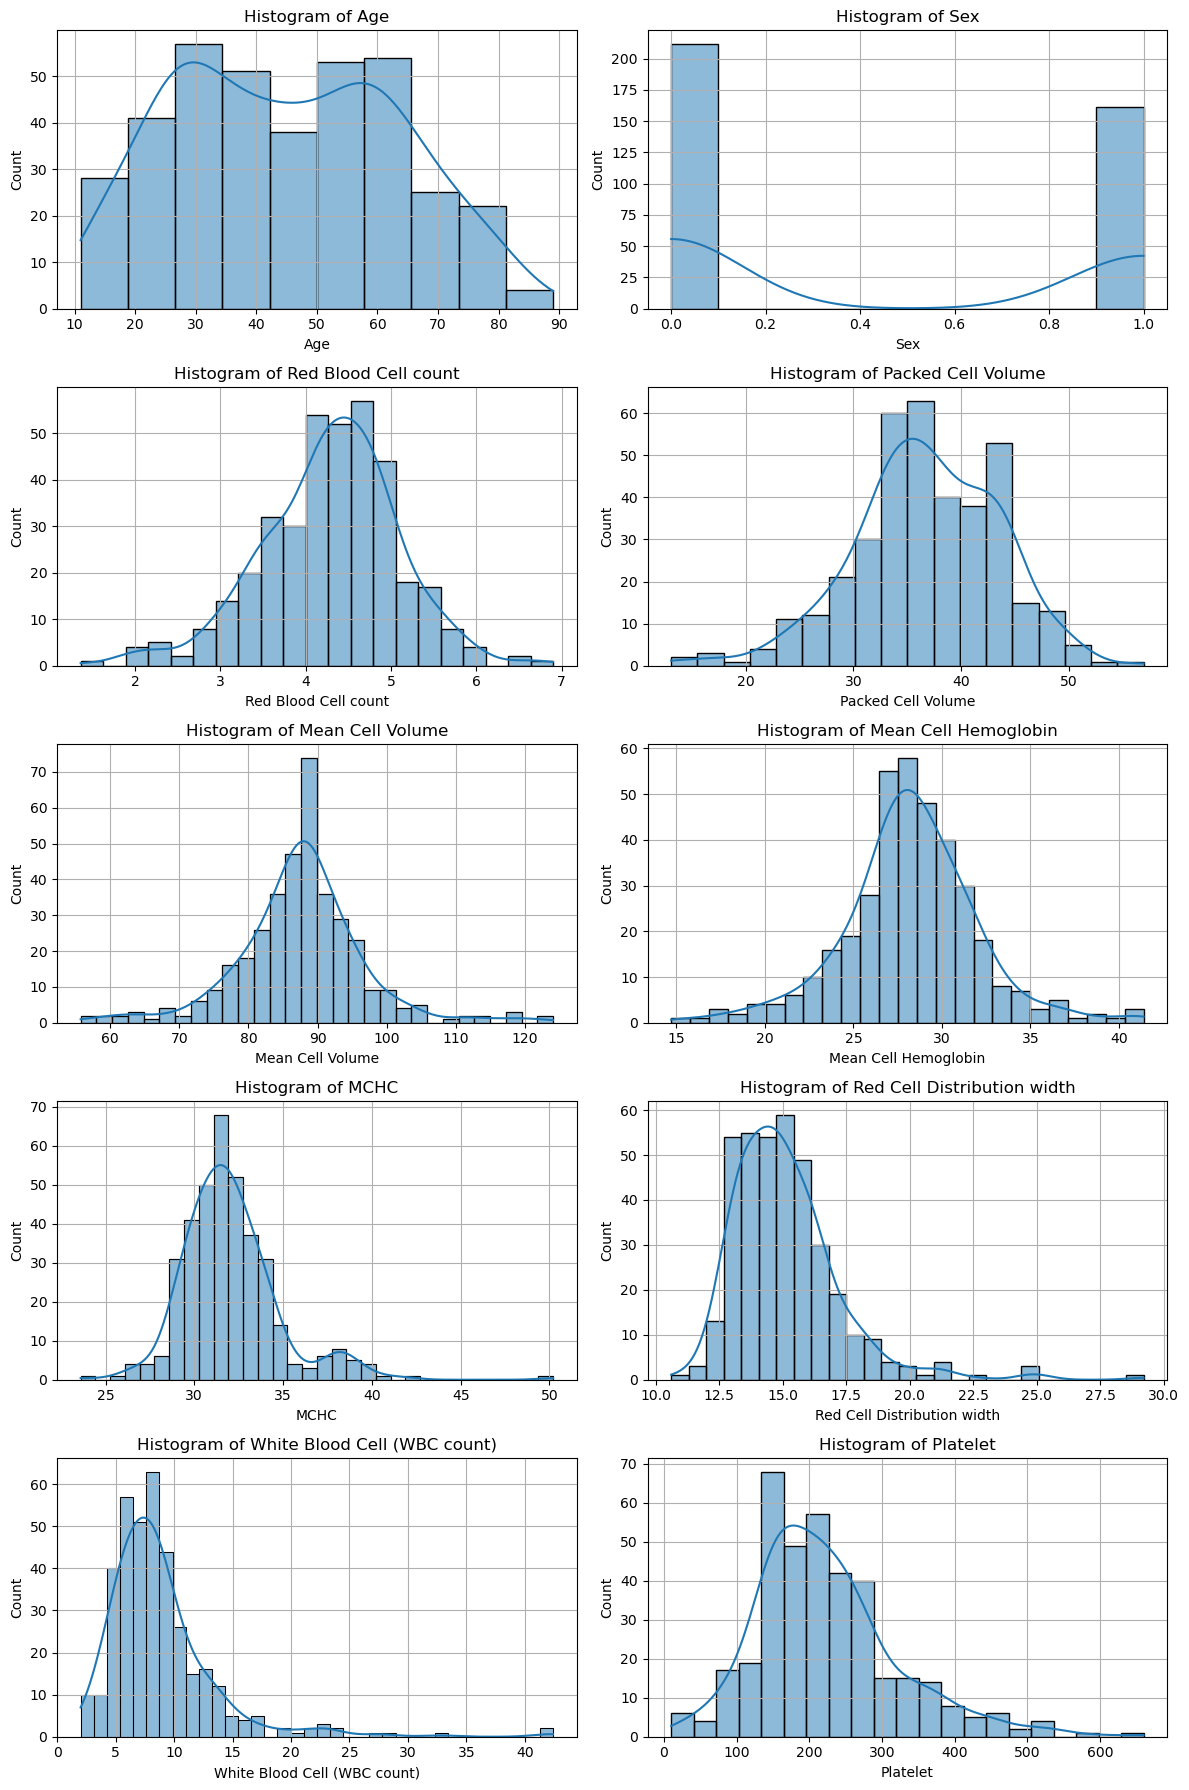

In [24]:
columns_for_hist = [
    'Age',
    'Sex',
    'Red Blood Cell count',
    'Packed Cell Volume',
    'Mean Cell Volume',
    'Mean Cell Hemoglobin',
    'MCHC',
    'Red Cell Distribution width',
    'White Blood Cell (WBC count)',
    'Platelet']
# Create a single figure with subplots
num_rows = 5
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create histograms for each column
for i, column in enumerate(columns_for_hist):
    sns.histplot(data=df, x=df[column], ax=axes[i], kde=True)  
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

# Hide any remaining empty subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Most attribute are normaly distributed. <br> Some are right skwed indicating the existence of extrime values <br> MCHC and Age columns are binormal 

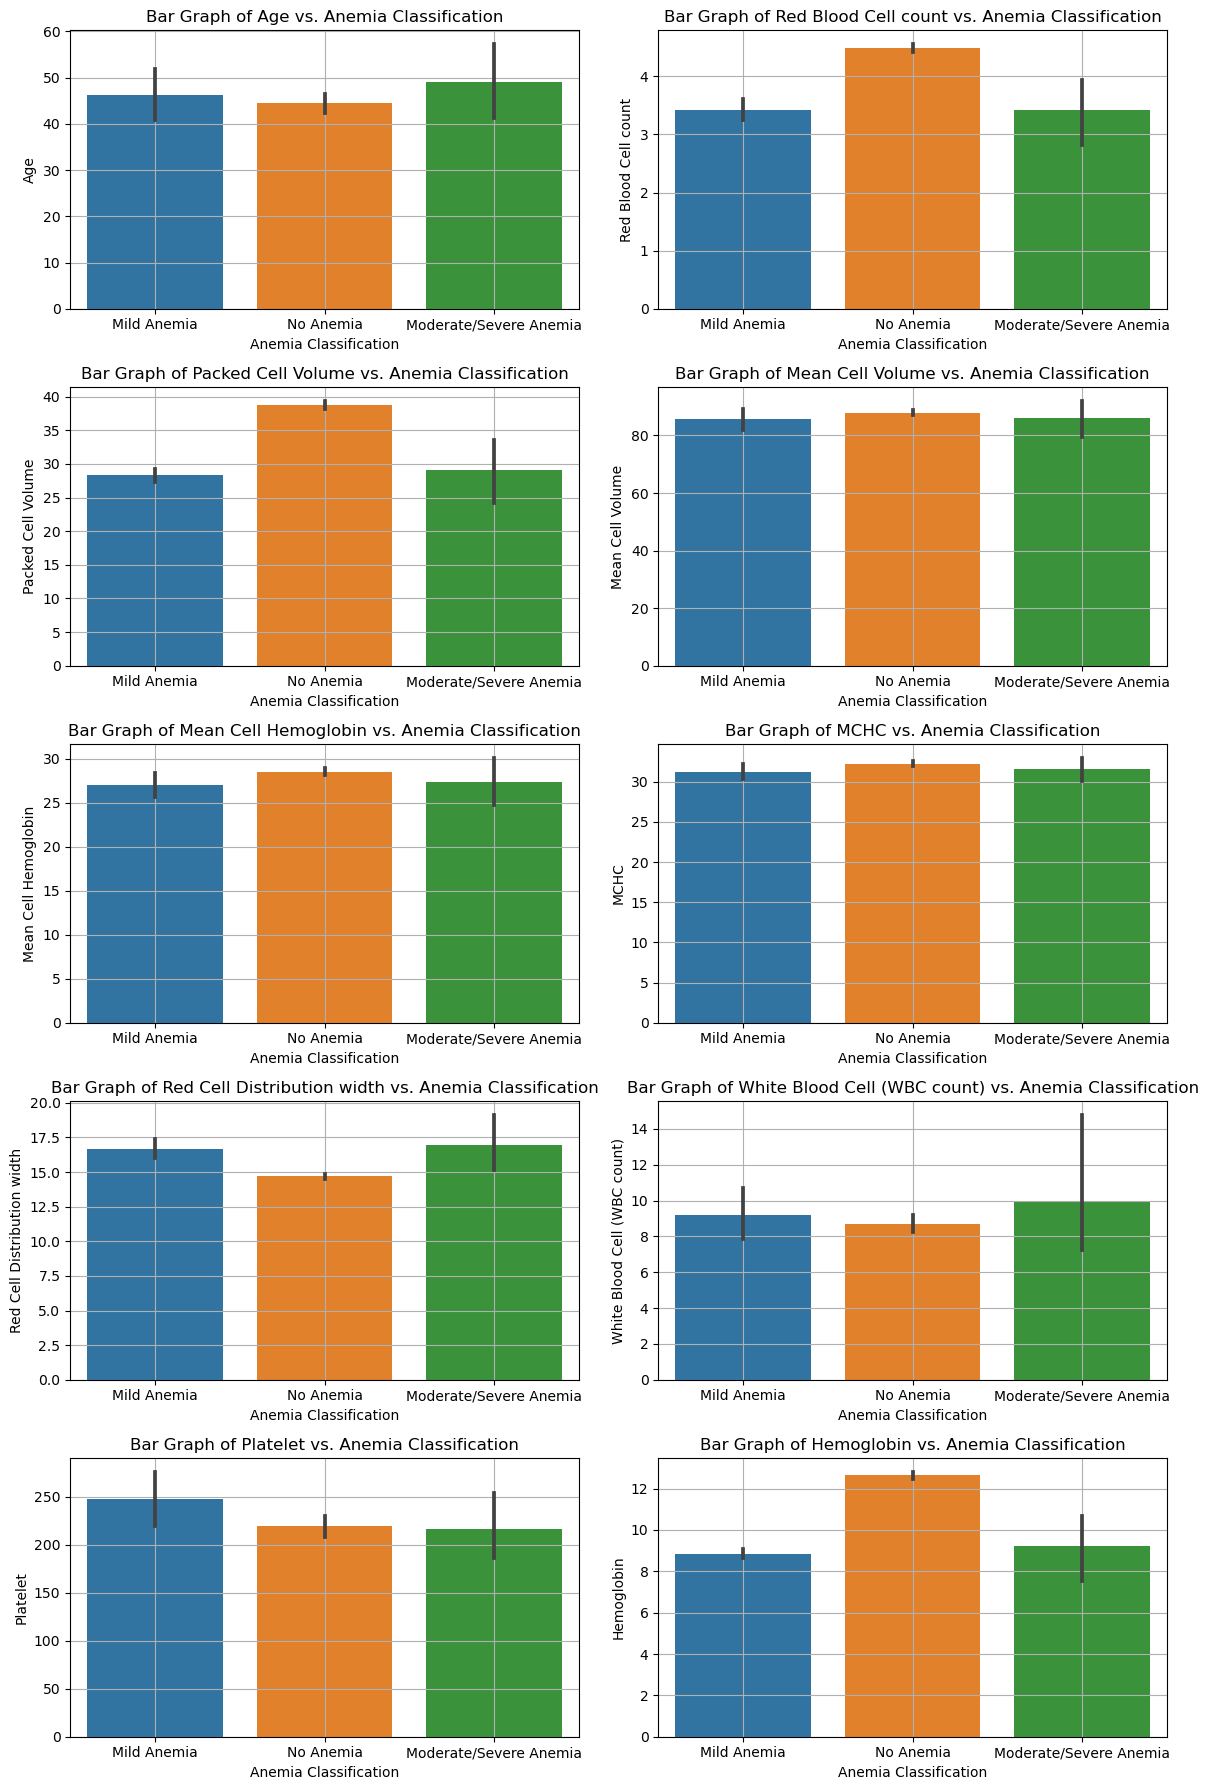

In [25]:

# List of columns to include in the bar graph
columns_for_bar = [
    'Age',
    'Red Blood Cell count',
    'Packed Cell Volume',
    'Mean Cell Volume',
    'Mean Cell Hemoglobin',
    'MCHC',
    'Red Cell Distribution width',
    'White Blood Cell (WBC count)',
    'Platelet',
    'Hemoglobin'
]
num_rows = 5
num_cols = 2
# Create a single figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create bar graphs for each variable against Anemia Classification
for i, column in enumerate(columns_for_bar):
    sns.barplot(data=df, x='Anemia Classification', y=column, ax=axes[i])
    axes[i].set_title(f'Bar Graph of {column} vs. Anemia Classification')
    axes[i].set_xlabel('Anemia Classification')
    axes[i].set_ylabel(column)
    axes[i].grid(True)
    

# Hide any remaining empty subplots
for j in range(len(columns_for_bar), num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()






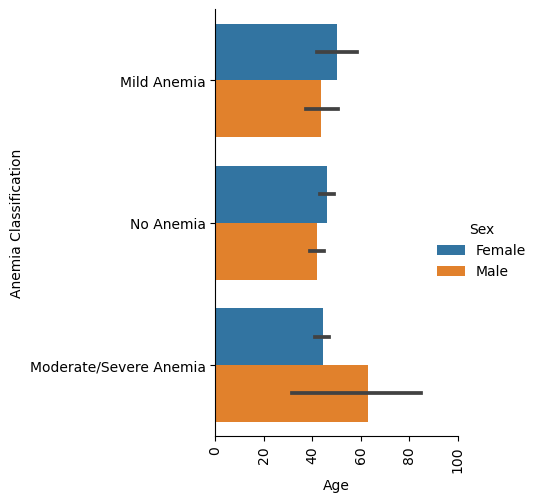

In [26]:
#creating a distribution between sex and anemia class
g = sns.catplot(data=df, x='Age', y='Anemia Classification', hue='Sex', kind='bar')
g.set_xticklabels(rotation=90)
g.set_axis_labels('Age', 'Anemia Classification')
g._legend.set_title('Sex')
new_labels = ['Female', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

The plot above indicates that Mild Anemia is more prevalent in females than it is in males.
Moderate/Severe Anemia is more prevalent in males than it is in females
There is also a higher number of females who have no anemia compared to males although not by a wide margin

### (c) Class Balancing


In [27]:
# checking the first five rows of the dataframe

df.head()

,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin,Anemia Classification
1,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,Mild Anemia
2,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,No Anemia
3,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,No Anemia
4,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3,No Anemia
5,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5,No Anemia


In [28]:
# checking for the the counts in each class of anemia
df[["Anemia Classification"]].value_counts()

Anemia Classification 
No Anemia                 299
Mild Anemia                58
Moderate/Severe Anemia     16
Name: count, dtype: int64

In [29]:
#allocating the features and target to X and y
X = df[["Age", "Sex","Red Blood Cell count","Packed Cell Volume","Mean Cell Hemoglobin","MCHC","Red Cell Distribution width","White Blood Cell (WBC count)","Platelet","Hemoglobin"]]
y = df["Anemia Classification"] 

#printing the original counts of each level
print('Original dataset shape %s' % Counter(y))

#oversampling using smote
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#printing the new counts of the oversampled values
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'No Anemia': 299, 'Mild Anemia': 58, 'Moderate/Severe Anemia': 16})
Resampled dataset shape Counter({'Mild Anemia': 299, 'No Anemia': 299, 'Moderate/Severe Anemia': 299})


## Modelling

### (a)First Model - K-Nearest Neighbors

In [30]:
# splitting the train and test data

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.25,random_state = 0)

In [31]:
# standardization

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
#one hot encording the target variables
ohe = OneHotEncoder()
# encording y_train
y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)
y_train_encoded = ohe.fit_transform(y_train).toarray()
# encording y_test
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test_encoded = ohe.fit_transform(y_test).toarray()

In [33]:
# applying the algorithim
classfier = KNeighborsClassifier(n_neighbors = round(np.sqrt(len(df))))
classfier.fit(X_train,y_train_encoded)


KNeighborsClassifier(n_neighbors=19)

In [34]:
# predicted values
y_pred = classfier.predict(X_test)

In [35]:
# checking for accuracy
f1= f1_score(y_test_encoded, y_pred,average = "micro")
f1

0.935123042505593

In [36]:
conf_matrix = multilabel_confusion_matrix(y_test_encoded, y_pred)
conf_matrix

array([[[137,   7],
        [  1,  80]],

       [[142,   6],
        [  3,  74]],

       [[158,   0],
        [ 12,  55]]], dtype=int64)

#### Model Tunning

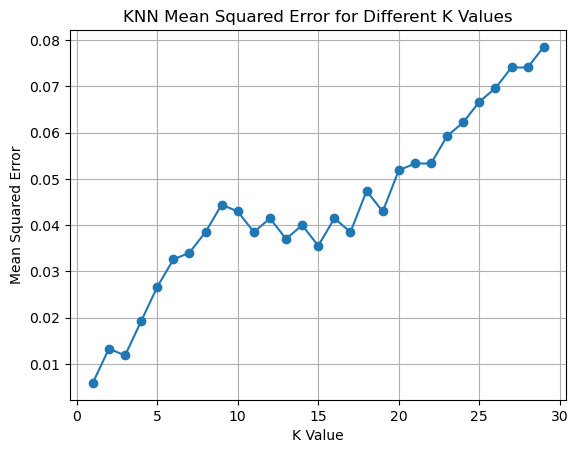

In [37]:
# finding the best value of our parameter k

k_range = range(1, 30)
mse = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train_encoded)
    y_pred = classifier.predict(X_test)
    
    # Calculate the MSE for this k
    mse_value = metrics.mean_squared_error(y_test_encoded, y_pred)
    mse.append(mse_value)

# Plot the MSE values against different values of k
plt.plot(k_range, mse, marker='o')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.title('KNN Mean Squared Error for Different K Values')
plt.grid(True)
plt.show()


The more the value of n_neighbors is increasing the more the mean squared error is increasing so it is advisable to use value less than neighbours for k

if we use k as 3 the results seems to improve

In [38]:
# using k as 3 becouse it has the minimum error
classfier = KNeighborsClassifier(n_neighbors = 3)
classfier.fit(X_train,y_train_encoded)

KNeighborsClassifier(n_neighbors=3)

In [39]:
# predicted values
y_pred = classfier.predict(X_test)

In [40]:
f1= f1_score(y_test_encoded, y_pred,average = "micro")
f1

0.9822222222222222

In [41]:
conf_matrix = multilabel_confusion_matrix(y_test_encoded, y_pred)
conf_matrix

array([[[141,   3],
        [  0,  81]],

       [[147,   1],
        [  0,  77]],

       [[158,   0],
        [  4,  63]]], dtype=int64)

### (b) Second Model - Decison Tree Classification 

In [42]:
# Create the DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)

# Fit the classifier to the training data
classifier.fit(X_train, y_train_encoded)

DecisionTreeClassifier(random_state=0)

In [43]:
# splitting the train and test data

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.25,random_state = 0)

In [44]:
# Predicting on the test data
y_pred = classifier.predict(X_test)

# Calculate F1-score
f1 = f1_score(y_test_encoded, y_pred, average="micro")
print("F1-score:", f1)

# Calculate the confusion matrix
conf_matrix = multilabel_confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", conf_matrix)

F1-score: 0.29777777777777775
Confusion Matrix:
 [[[144   0]
  [ 81   0]]

 [[148   0]
  [ 77   0]]

 [[  0 158]
  [  0  67]]]


C:\Users\dell 5450\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [45]:


# Predicting on the test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded.argmax(axis=1), y_pred.argmax(axis=1))
print("Accuracy:", accuracy)

Accuracy: 0.29777777777777775


C:\Users\dell 5450\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### Tuning using gridsearch CV

In [46]:


# Define the parameter grid you want to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=0)

# Create the GridSearchCV instance
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9642564953012716


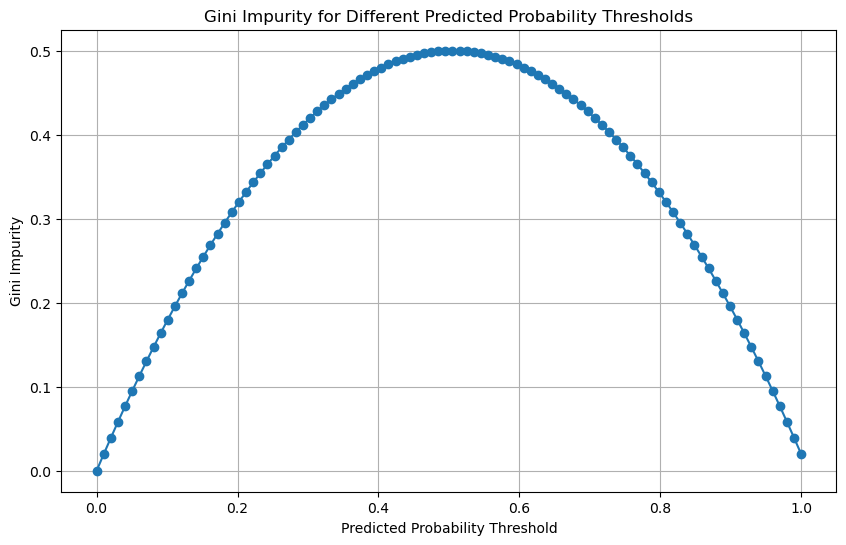

In [47]:


# Gini impurity calculation function
def gini_impurity(classes):
    unique_classes, class_counts = np.unique(classes, return_counts=True)
    class_probs = class_counts / np.sum(class_counts)
    gini = 1 - np.sum(class_probs ** 2)
    return gini

# Generate example data
classes = np.array([0, 1, 1, 0, 0, 1, 0, 1])
predicted_probabilities = np.linspace(0, 1, 100)

# Calculate Gini impurity for different splits
gini_values = []
for p in predicted_probabilities:
    class_predictions = np.where(predicted_probabilities >= p, 1, 0)
    gini = gini_impurity(class_predictions)
    gini_values.append(gini)

# Plot the Gini impurity values
plt.figure(figsize=(10, 6))
plt.plot(predicted_probabilities, gini_values, marker='o')
plt.xlabel('Predicted Probability Threshold')
plt.ylabel('Gini Impurity')
plt.title('Gini Impurity for Different Predicted Probability Thresholds')
plt.grid()
plt.show()

### Third Model - Gaussian Naive Bayes Model

In [48]:
# splitting the train and test data

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.4,random_state = 0)

In [49]:
# Fitting Naive Bayes to the Training set 
Bayes = GaussianNB()  
Bayes.fit(X_train, y_train) 

GaussianNB()

In [50]:
#Predicting the Test set results  

y_pred3 = Bayes.predict(X_test)


In [51]:
Bayes_accuracy = accuracy_score(y_test, y_pred3)
Bayes_accuracy

0.7437325905292479

In [56]:
 
cmn = confusion_matrix(y_test, y_pred3)  

print(cmn) 

[[119   6   0]
 [ 12  44  64]
 [  4   6 104]]


### Hyperparameter Tune using Training Data

In [57]:
#Define Grid Search Parameters


param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}


NaiveModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10)
NaiveModel_grid.fit(X_train, y_train)
print(NaiveModel_grid.best_estimator_)

<br>estimator is the machine learning model of interest, provided the model has a scoring function; in this case, the model assigned is GaussianNB().

<br>param_grid is a dictionary with parameters names (string) as keys and lists of parameter settings to try as values; this enables searching over any sequence of parameter settings.

<br>verbose is the verbosity: the higher, the more messages; in this case, it is set to 1.

<br>cv is the cross-validation generator or an iterable, in this case, there is a 10-fold cross-validation.

In [60]:
#Predict on Testing Data
y_pred_tune = NaiveModel_grid.predict(X_test)

In [61]:

Tune_accuracy_score = accuracy_score(y_test, y_pred_tune)
Tune_accuracy_score

0.841225626740947

In [62]:
 
cmn = confusion_matrix(y_test, y_pred_tune)  

print(cmn) 

[[105  20   0]
 [ 18 102   0]
 [  8  11  95]]


### (d) Fourth Model - Support Vector Machines

In [66]:
# instatiating the svm classifier with a nin-linear kernel

clf = SVC(kernel = "rbf")

# fitting the classifier to the training data

clf.fit(X_train , y_train)

# making predictions with the test and train data
y_pred = clf.predict(X_test)
y_pred1 = clf.predict(X_train)

In [67]:
# calculating the f1 score and the accuracy of the training and testing data
#accuracy for the training data 
acc1 = accuracy_score(y_train , y_pred1)
print(f'Trainning accuracy : {acc1 :.2f}')

#accuracy for the test data
acc2 = accuracy_score(y_test , y_pred)
print(f'Testing accuracy : {acc2 :.2f}')

#f1 score for the training data
f1 = f1_score(y_train, y_pred1, average='weighted')
print(f'F1 Score for training data: {f1:.2f}')

#f1 score for the testing data
f2 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score for testing data: {f2:.2f}')




Trainning accuracy : 0.54
Testing accuracy : 0.55
F1 Score for training data: 0.53
F1 Score for testing data: 0.53


The accuracy score of the model is very low which might indicate underfitting.

#### Tuning the model using grid search

In [68]:
# Creating a pipeline with an SVM classifier
pipe = Pipeline([
    ('clf', SVC())
])

# Defining the hyperparameter grid for the grid search
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

# Create a grid search object
grid = GridSearchCV(pipe, param_grid, cv=5)

# Fit the grid search to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters
print(f'Best hyperparameters: {grid.best_params_}')

Best hyperparameters: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}


In [70]:
# predicting our train and test data

y_p_1 = grid.predict(X_train)
y_p_2 = grid.predict(X_test)

In [71]:
# calculating the accuracy anf f1 score of the train and test data

#accuracy for the training data 
acc1 = accuracy_score(y_train , y_p_1)
print(f'Trainning accuracy : {acc1 :.2f}')

#accuracy for the test data
acc2 = accuracy_score(y_test , y_p_2)
print(f'Testing accuracy : {acc2 :.2f}')

#f1 score for the training data
f1 = f1_score(y_train, y_p_1, average='weighted')
print(f'F1 Score for training data: {f1:.2f}')

#f1 score for the testing data
f2 = f1_score(y_test, y_p_2, average='weighted')
print(f'F1 Score for testing data: {f2:.2f}')



Trainning accuracy : 0.88
Testing accuracy : 0.89
F1 Score for training data: 0.88
F1 Score for testing data: 0.89


After hyperparameter tuning the model seems to be doing better indicating that is learning from the data.
Also the test and the train accuracy have a small margin difference indicating the model is not overfitting.
